In [6]:
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

In [7]:
reviews = ['nice food',
        'amazing restaurant',
        'too good',
        'just loved it!',
        'will go again',
        'horrible food',
        'never go there',
        'poor service',
        'poor quality',
        'needs improvement']
# 1=> +ve review, 0 => -ve review
predictons = np.array([1,1,1,1,1,0,0,0,0,0]) 

In [8]:
# convert each word in an encoded form
# make a vocab of possible words in review, each word then points to a number
vocab_size = 50
encoded_reviews = [one_hot(d, vocab_size) for d in reviews]
encoded_reviews

[[7, 36],
 [6, 38],
 [44, 26],
 [12, 39, 26],
 [25, 37, 26],
 [2, 36],
 [29, 37, 27],
 [43, 13],
 [43, 15],
 [44, 49]]

In [9]:
# to handle unpredictible count of words in input -> a problem in which we are not sure about the number of input neurons
# we take a max_count and add padding for less words
max_length = np.array([3])
padded_reviews = pad_sequences(encoded_reviews, maxlen=max_length, padding='post')
padded_reviews

array([[ 7, 36,  0],
       [ 6, 38,  0],
       [44, 26,  0],
       [12, 39, 26],
       [25, 37, 26],
       [ 2, 36,  0],
       [29, 37, 27],
       [43, 13,  0],
       [43, 15,  0],
       [44, 49,  0]])

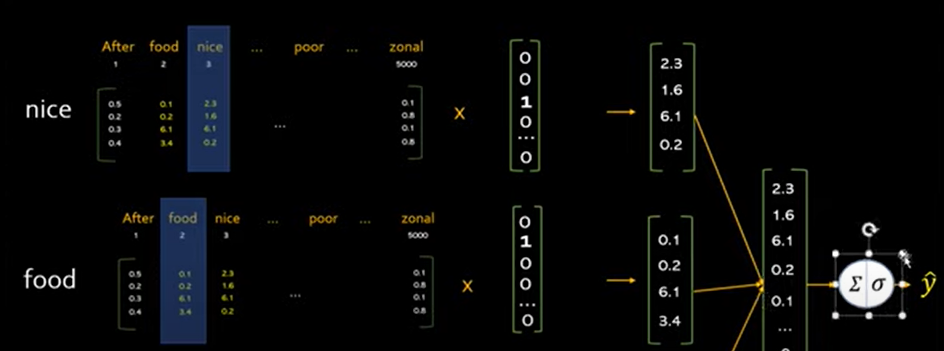

In [16]:
embeded_vector_size = 4

model = Sequential()
model.add(Embedding(vocab_size, embeded_vector_size,name="embedding",input_shape=(3,1)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [17]:
X = padded_reviews
y = predictons
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
print(model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 3, 1, 4)             │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 213 (852.00 B)

 Trainable params: 213 (852.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [19]:
model.fit(X, y, epochs=50, verbose=0)

In [20]:
# evaluate the model
loss, accuracy = model.evaluate(X, y)
accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 1.0000 - loss: 0.6353


1.0

In [21]:
weights = model.get_layer('embedding').get_weights()[0]
len(weights)

50

In [22]:
# check the encoded version of words "amazing, nice"
print(weights[7],weights[6])


[-0.09809837 -0.04318498  0.09485965  0.01123136] [-0.03180879 -0.01979614  0.0355329   0.08904809]
